In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import version
version()

'2.3.10'

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/private projects/Machine learning swiss data notebooks/homegate_prices_with_population.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2203 non-null   int64  
 1   price               2203 non-null   int64  
 2   type                2203 non-null   object 
 3   room_num            2089 non-null   float64
 4   floor               2203 non-null   object 
 5   area_m2             2038 non-null   float64
 6   floors_num          2203 non-null   float64
 7   year_built          1669 non-null   float64
 8   last_refurbishment  1740 non-null   float64
 9   city                2203 non-null   object 
 10  zip                 2203 non-null   int64  
 11  lat                 2203 non-null   float64
 12  lon                 2203 non-null   float64
 13  canton              2203 non-null   object 
 14  population          2203 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 258.3+

In [ ]:
data['canton'].unique()

array(['Kanton Zürich', 'Ticino', 'Kanton Basel-Landschaft',
       'Kanton St. Gallen', 'Kanton Thurgau', 'Kanton Aargau',
       'Kanton Luzern', 'Kanton Schaffhausen', 'Kanton Schwyz',
       'Neuchâtel', 'Canton de Berne', 'Canton du Valais',
       'Kanton Graubünden', 'Kanton Zug', 'Kanton Solothurn', 'Genève',
       'Canton de Vaud', 'Jura', 'Canton de Fribourg', 'Kanton Uri',
       'Kanton Appenzell Ausserrhoden', 'Kanton Obwalden',
       'Kanton Basel-Stadt', 'Kanton Glarus',
       'Kanton Appenzell Innerrhoden'], dtype=object)

In [ ]:
data.head()

,Unnamed: 0,price,type,room_num,floor,area_m2,floors_num,year_built,last_refurbishment,city,zip,lat,lon,canton,population
0,0,1235000,Apartment,2.5,GF,138.0,4.0,2015.0,2018.0,Aeugst am Albis,8914,47.2822,8.48965,Kanton Zürich,1493398.0
1,1,650000,Apartment,4.5,1,121.0,1.0,1987.0,2021.0,Agno,6982,46.0005,8.90280,Ticino,287004.0
2,2,1062900,Apartment,2.5,1,63.0,1.0,NaN,NaN,Bissone,6816,45.9510,8.96550,Ticino,287004.0
3,3,1125500,Attic flat,2.5,3,63.0,1.0,NaN,NaN,Bissone,6816,45.9510,8.96550,Ticino,287004.0
4,4,2180700,Apartment,3.5,2,125.0,1.0,NaN,NaN,Bissone,6816,45.9510,8.96550,Ticino,287004.0


In [ ]:
data.isna().sum()

Unnamed: 0              0
price                   0
type                    0
room_num              114
floor                   0
area_m2               165
floors_num              0
year_built            534
last_refurbishment    463
city                    0
zip                     0
lat                     0
lon                     0
canton                  0
population              0
dtype: int64

In [ ]:
data = data.drop(columns=['last_refurbishment', 'Unnamed: 0'], axis=1)

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 2202
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       1547 non-null   int64  
 1   type        1547 non-null   object 
 2   room_num    1547 non-null   float64
 3   floor       1547 non-null   object 
 4   area_m2     1547 non-null   float64
 5   floors_num  1547 non-null   float64
 6   year_built  1547 non-null   float64
 7   city        1547 non-null   object 
 8   zip         1547 non-null   int64  
 9   lat         1547 non-null   float64
 10  lon         1547 non-null   float64
 11  canton      1547 non-null   object 
 12  population  1547 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 169.2+ KB


# EDA

In [ ]:
data.describe()

,price,room_num,area_m2,floors_num,year_built,zip,lat,lon,population
count,1.547000e+03,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1.547000e+03
mean,1.574994e+06,5.377505,174.449257,1.722689,1991.109890,5204.488688,46.583195,8.131440,4.305869e+05
std,1.641622e+06,2.449363,114.304276,1.386507,44.232519,2521.979073,0.585472,0.922827,3.418275e+05
min,1.350000e+05,1.000000,28.000000,1.000000,1600.000000,1009.000000,45.828300,6.008600,8.804000e+03
25%,7.000000e+05,3.500000,105.000000,1.000000,1979.000000,1994.000000,46.133000,7.362300,2.626270e+05
50%,1.160000e+06,4.500000,145.000000,1.000000,2005.000000,6514.000000,46.284500,8.458200,2.870040e+05
75%,1.700000e+06,6.500000,200.000000,2.000000,2021.000000,6934.000000,47.245900,8.932167,4.670470e+05
max,1.900000e+07,29.000000,1300.000000,18.000000,2024.000000,9656.000000,47.722800,10.370400,1.493398e+06


In [ ]:
data.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))

type       18
floor      15
city      587
canton     24
dtype: int64

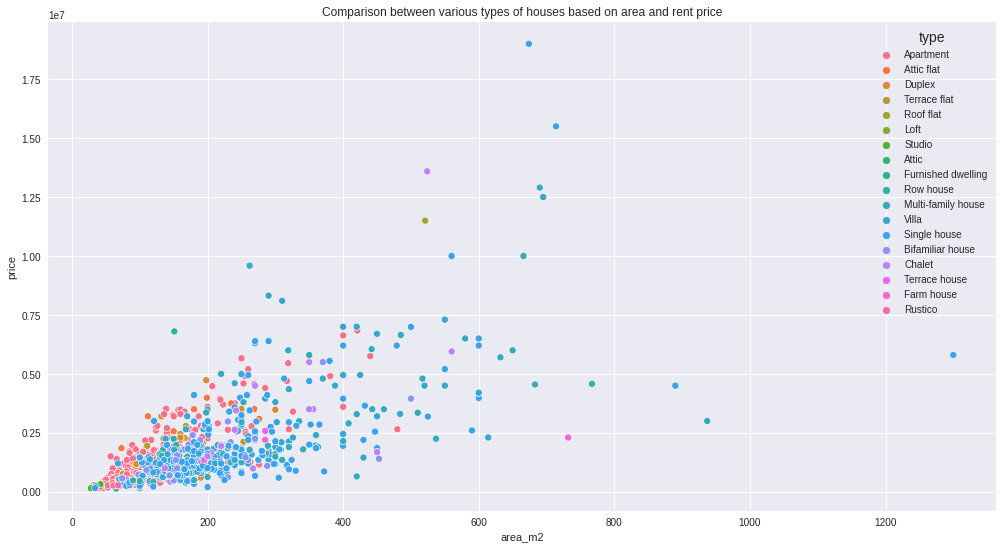

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various types of houses based on area and rent price')
sns.scatterplot(data["area_m2"], data['price'], hue =data['type'],s=50)

In [ ]:
data.columns

Index(['price', 'type', 'room_num', 'floor', 'area_m2', 'floors_num',
       'year_built', 'city', 'zip', 'lat', 'lon', 'canton', 'population'],
      dtype='object')

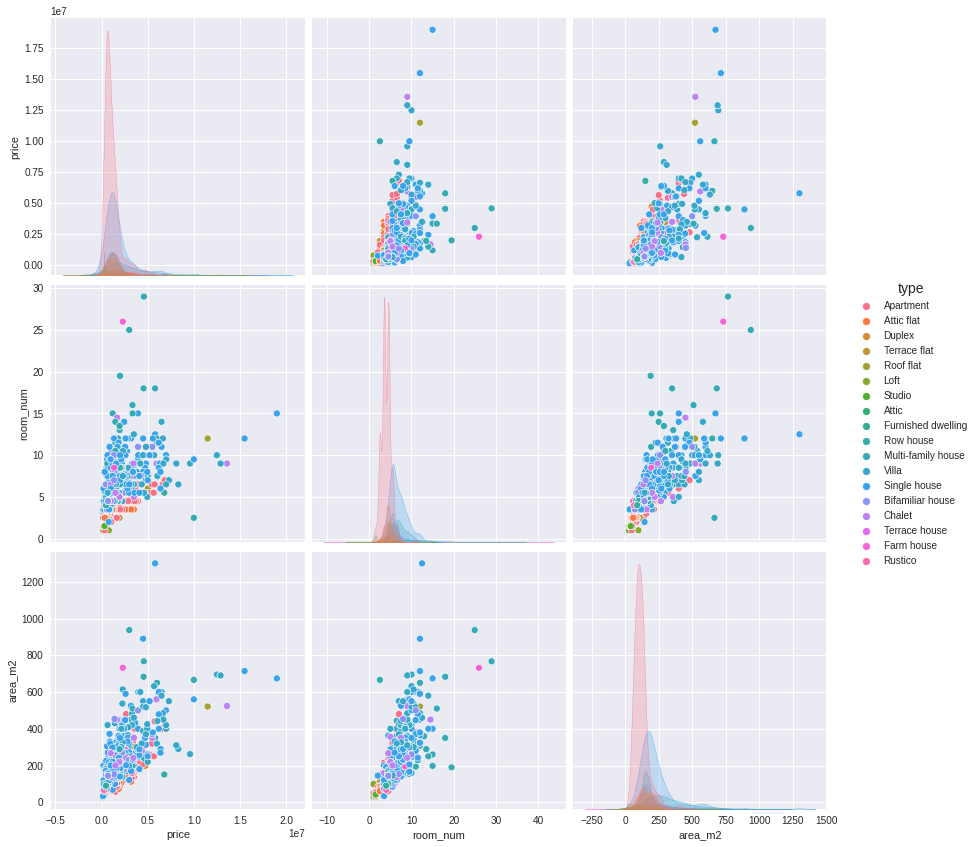

In [ ]:
sns.pairplot(data[['price', 'type', 'room_num', 'area_m2']], hue='type' ,height=4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0d8e94790>,
      dtype=object)

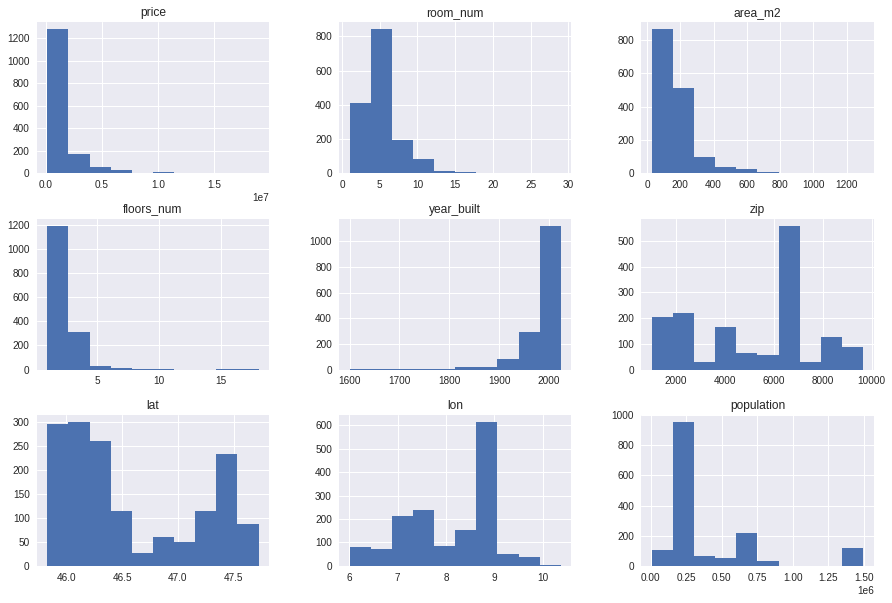

In [ ]:
data.hist(figsize=(15, 10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

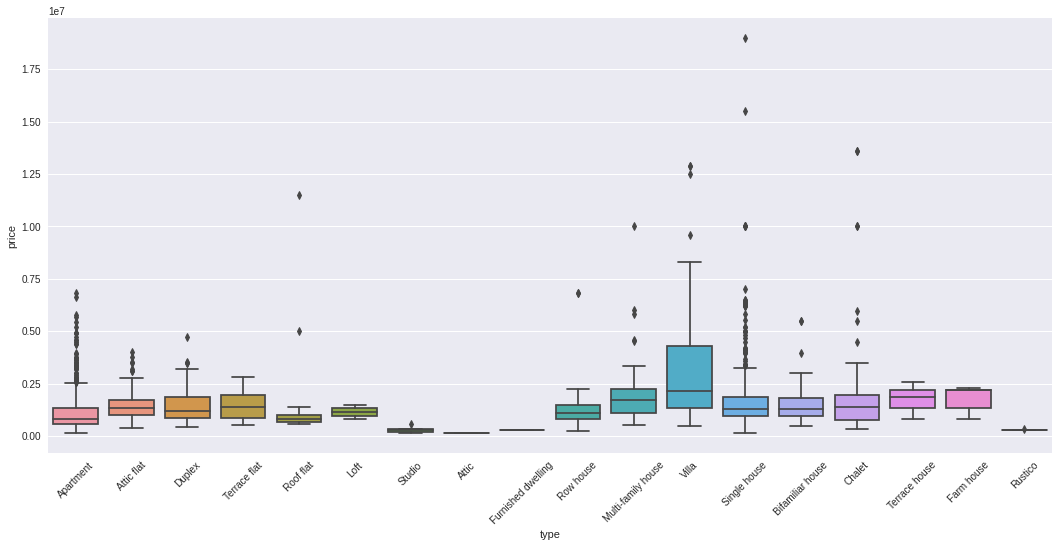

In [ ]:

fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot( ax=ax, y='price', x= 'type', data=data, orient='v')
plt.xticks(rotation=45)

In [ ]:
np.mean(data['price']), np.median(data['price'])

(1574994.0510665805, 1160000.0)

In [ ]:
#  = pd.DataFrame({'Mietpreis_Brutto': [1 if hp > 1500 else 0 for hp in y]})
data['price'] = np.where(data['price'] > 1200000, 1, 0)

In [ ]:
X = data.drop(columns=['price'], axis=1)
y = data['price']
X.shape, y.shape

((1547, 12), (1547,))

In [ ]:
y.value_counts()

0    836
1    711
Name: price, dtype: int64

In [ ]:
X.shape, y.shape

((1547, 12), (1547,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape

((1237, 12), (310, 12), (1237,))

In [ ]:
X_train

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population
662,Apartment,5.5,GF,158.0,1.0,2017.0,Fontaines NE,2046,47.0427,6.9018,Neuchâtel,133348.0
714,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.0354,Canton de Fribourg,214516.0
1671,Villa,7.0,GF,425.0,1.0,2000.0,Fosano,6574,46.1307,8.8563,Ticino,287004.0
1845,Row house,4.5,GF,110.0,2.0,2010.0,Pura,6984,45.9833,8.8652,Ticino,287004.0
1964,Single house,8.5,GF,231.0,3.0,1962.0,Aarau,5000,47.3887,8.0483,Kanton Aargau,621380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Row house,5.5,GF,125.0,3.0,1996.0,Buus,4463,47.5047,7.8661,Kanton Basel-Landschaft,262924.0
1814,Single house,5.5,GF,130.0,1.0,1977.0,Obfelden,8912,47.2615,8.4220,Kanton Zürich,1493398.0
1193,Single house,10.5,GF,293.0,1.0,1996.0,Bad Ragaz,7310,46.9969,9.4731,Kanton St. Gallen,430145.0
2052,Single house,4.5,GF,100.0,1.0,1960.0,Airolo,6780,46.5272,8.6149,Ticino,287004.0


In [ ]:
pd.concat([X_train, y_train], axis=1)

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,price
662,Apartment,5.5,GF,158.0,1.0,2017.0,Fontaines NE,2046,47.0427,6.9018,Neuchâtel,133348.0,0
714,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.0354,Canton de Fribourg,214516.0,0
1671,Villa,7.0,GF,425.0,1.0,2000.0,Fosano,6574,46.1307,8.8563,Ticino,287004.0,1
1845,Row house,4.5,GF,110.0,2.0,2010.0,Pura,6984,45.9833,8.8652,Ticino,287004.0,0
1964,Single house,8.5,GF,231.0,3.0,1962.0,Aarau,5000,47.3887,8.0483,Kanton Aargau,621380.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Row house,5.5,GF,125.0,3.0,1996.0,Buus,4463,47.5047,7.8661,Kanton Basel-Landschaft,262924.0,0
1814,Single house,5.5,GF,130.0,1.0,1977.0,Obfelden,8912,47.2615,8.4220,Kanton Zürich,1493398.0,1
1193,Single house,10.5,GF,293.0,1.0,1996.0,Bad Ragaz,7310,46.9969,9.4731,Kanton St. Gallen,430145.0,1
2052,Single house,4.5,GF,100.0,1.0,1960.0,Airolo,6780,46.5272,8.6149,Ticino,287004.0,0


# Initialize Setup

In [ ]:
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'price', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='swiss1')

,Description,Value
0,session_id,13
1,Target,price
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1237, 13)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/09/21 11:37:37 INFO mlflow.tracking.fluent: Experiment with name 'swiss1' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer

# Compare Baseline

In [ ]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8671,0.9306,0.8542,0.8652,0.8588,0.7333,0.7346,0.450
lightgbm,Light Gradient Boosting Machine,0.8509,0.9213,0.8614,0.8320,0.8459,0.7015,0.7029,0.306
gbc,Gradient Boosting Classifier,0.8439,0.9146,0.8347,0.8390,0.8351,0.6871,0.6898,0.268
et,Extra Trees Classifier,0.8416,0.9207,0.8176,0.8452,0.8305,0.6820,0.6832,0.430
ada,Ada Boost Classifier,0.8289,0.9039,0.8029,0.8339,0.8164,0.6564,0.6590,0.150
dt,Decision Tree Classifier,0.8208,0.8209,0.8224,0.8070,0.8136,0.6412,0.6429,0.044
ridge,Ridge Classifier,0.8231,0.0000,0.7860,0.8328,0.8084,0.6444,0.6457,0.046
knn,K Neighbors Classifier,0.7699,0.8532,0.7423,0.7664,0.7536,0.5381,0.5389,0.140
lr,Logistic Regression,0.7757,0.8527,0.7130,0.7970,0.7514,0.5483,0.5525,0.760
lda,Linear Discriminant Analysis,0.7179,0.7194,0.7445,0.6883,0.7148,0.4367,0.4386,0.130


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# Create Model

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7931,0.8886,0.7619,0.8000,0.7805,0.5851,0.5857
1,0.8621,0.9467,0.8293,0.8718,0.8500,0.7225,0.7233
2,0.8506,0.9199,0.8293,0.8500,0.8395,0.6998,0.6999
3,0.8966,0.9820,0.9024,0.8810,0.8916,0.7927,0.7929
4,0.9080,0.9618,0.9268,0.8837,0.9048,0.8160,0.8168
5,0.8721,0.9276,0.8780,0.8571,0.8675,0.7439,0.7441
6,0.9070,0.9772,0.9756,0.8511,0.9091,0.8148,0.8227
7,0.8721,0.9328,0.8537,0.8750,0.8642,0.7434,0.7436
8,0.8023,0.9030,0.8537,0.7609,0.8046,0.6059,0.6100


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# Tune Hyperparameters

In [ ]:
tuned_rf = tune_model(rf, n_iter=50,
                      optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8046,0.8889,0.7857,0.8049,0.7952,0.6084,0.6086
1,0.7931,0.9067,0.8293,0.7556,0.7907,0.5870,0.5895
2,0.8506,0.9173,0.8293,0.8500,0.8395,0.6998,0.6999
3,0.9195,0.9692,0.9024,0.9250,0.9136,0.8383,0.8386
4,0.8621,0.9247,0.8780,0.8372,0.8571,0.7240,0.7247
5,0.8140,0.8607,0.8293,0.7907,0.8095,0.6279,0.6286
6,0.8605,0.9436,0.9512,0.7959,0.8667,0.7227,0.7354
7,0.8488,0.9225,0.8537,0.8333,0.8434,0.6973,0.6975
8,0.7674,0.8591,0.8537,0.7143,0.7778,0.5379,0.5473


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

# Analyze Model

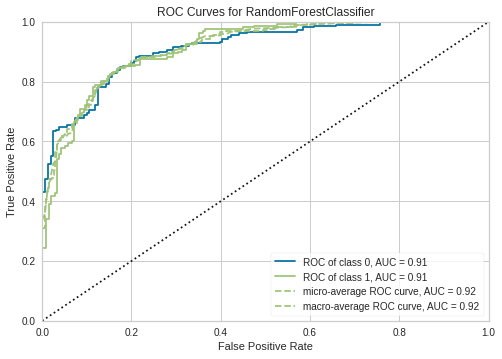

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf)

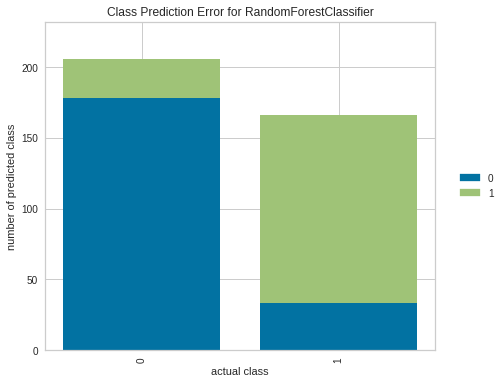

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'error')

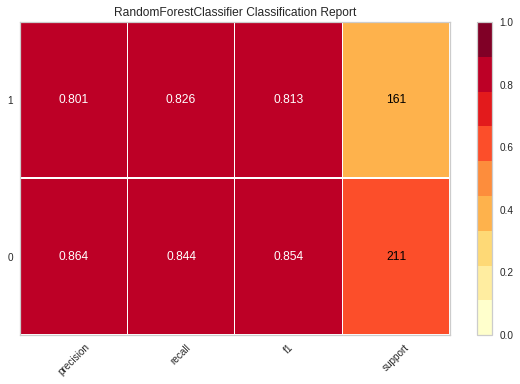

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'class_report')

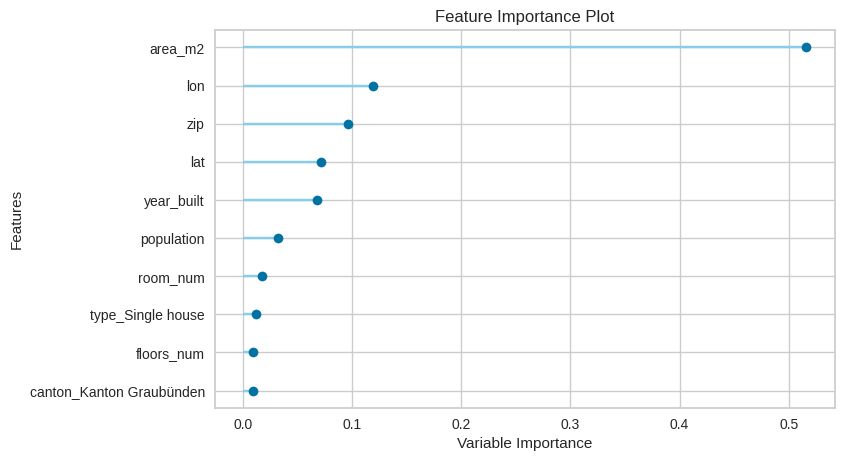

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'feature')

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpret Model

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
interpret_model(tuned_rf, plot='msa')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=msa, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: msa
INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=area_m2, kwargs={}, observation=None, plot=correlation, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: type 1


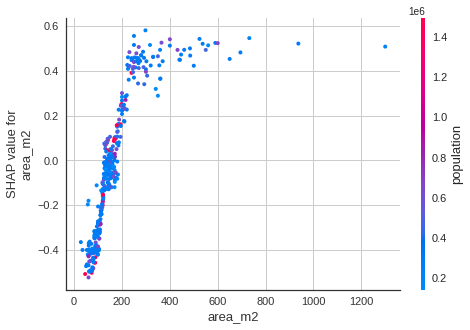

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf, feature="area_m2", plot = 'correlation')

In [ ]:
interpret_model(tuned_rf, plot = 'reason', observation = 12)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=12, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


# AutoML()

In [ ]:
best = automl(optimize = 'f1')
best

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=f1, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshol

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

# Predict Model

In [ ]:
X_test.head()

In [ ]:
predictions = predict_model(tuned_rf, data=X_test)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,Label,Score
48,Apartment,3.5,4,124.0,6.0,2012.0,Zürich,8045,47.3531,8.508900,Kanton Zürich,1493398.0,1,0.8149
1088,Attic flat,4.5,5,212.0,1.0,1994.0,Sion,1950,46.2304,7.362300,Canton du Valais,262627.0,0,0.5169
1403,Farm house,7.5,GF,285.0,3.0,1828.0,Rothrist,4852,47.2983,7.883600,Kanton Aargau,621380.0,1,0.9673
808,Apartment,6.0,5,400.0,1.0,2022.0,Lugano,6900,46.0126,8.951067,Ticino,287004.0,1,1.0000
720,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.035400,Canton de Fribourg,214516.0,0,0.9177


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = predictions['Label']
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[150  21]
 [ 25 114]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       171
           1       0.84      0.82      0.83       139

    accuracy                           0.85       310
   macro avg       0.85      0.85      0.85       310
weighted avg       0.85      0.85      0.85       310



In [ ]:
predictions = predict_model(best, data=X_test)
predictions = predictions['Label']
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


[[153  18]
 [ 21 118]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       171
           1       0.87      0.85      0.86       139

    accuracy                           0.87       310
   macro avg       0.87      0.87      0.87       310
weighted avg       0.87      0.87      0.87       310



# Save / Load Model

In [ ]:
save_model(tuned_rf, model_name='best-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False), model_name=best-model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_feat

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=9, max_features=1.0,
                                         max_leaf_n

In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=best-model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=9, max_features=1.0,
             

In [ ]:
predict_model(loaded_bestmodel, data=X_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=9, max_features

,type,room_num,floor,area_m2,floors_num,year_built,city,zip,lat,lon,canton,population,Label,Score
48,Apartment,3.5,4,124.0,6.0,2012.0,Zürich,8045,47.3531,8.508900,Kanton Zürich,1493398.0,1,0.8149
1088,Attic flat,4.5,5,212.0,1.0,1994.0,Sion,1950,46.2304,7.362300,Canton du Valais,262627.0,0,0.5169
1403,Farm house,7.5,GF,285.0,3.0,1828.0,Rothrist,4852,47.2983,7.883600,Kanton Aargau,621380.0,1,0.9673
808,Apartment,6.0,5,400.0,1.0,2022.0,Lugano,6900,46.0126,8.951067,Ticino,287004.0,1,1.0000
720,Apartment,4.5,1,122.0,1.0,2016.0,La Tour-de-Trême,1635,46.5889,7.035400,Canton de Fribourg,214516.0,0,0.9177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,Bifamiliar house,11.0,GF,370.0,2.0,1950.0,Le Grand-Saconnex,1218,46.2338,6.122100,Genève,467047.0,1,0.9095
1065,Apartment,3.5,2,88.0,1.0,2021.0,Sion,1950,46.2304,7.362300,Canton du Valais,262627.0,0,0.9750
1737,Single house,5.5,GF,200.0,2.0,2001.0,Lugano,6900,46.0126,8.951067,Ticino,287004.0,1,0.7127
504,Apartment,1.0,GF,32.0,1.0,2020.0,Bramois,1967,46.2352,7.403200,Canton du Valais,262627.0,0,1.0000


# End of notebook